In [2]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('CNN.h5')

ValueError: No model config found in the file at CNN.h5.

In [3]:
!pip install flask

In [5]:
!pip install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


✅ Test images loaded successfully!
X_test shape: (7178, 224, 224, 1, 1)
y_test shape: (7178,)
225/225 ━━━━━━━━━━━━━━━━━━━━ 535s 2s/step


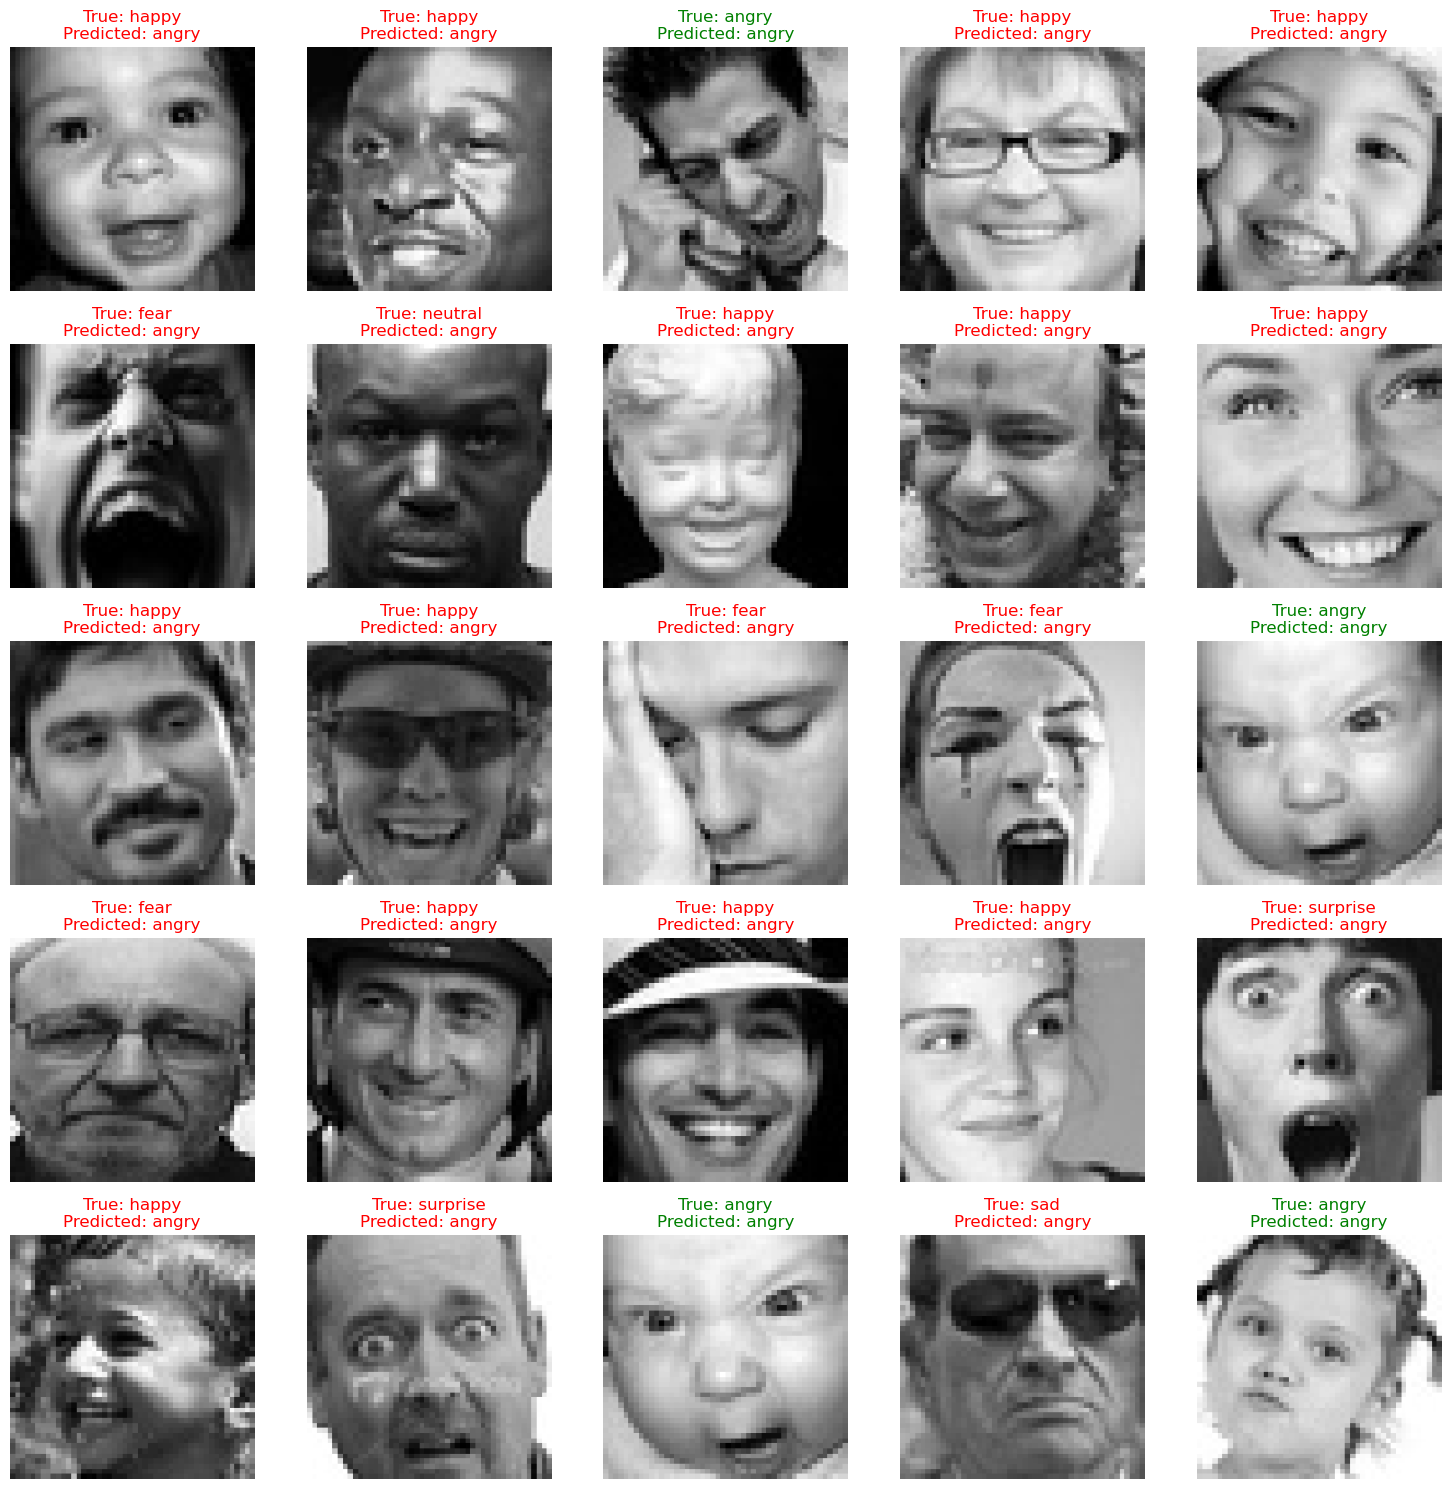

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load your trained model
model_path = 'emotion_model_sequential.h5'  # Change this to your actual model path
model = load_model(model_path)

# Define the path to your test images
test_dir = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test'

# Define emotion labels (ensure they match your training labels)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load test images and labels
X_test = []
y_test = []
image_paths = []

for emotion in emotion_labels:
    emotion_path = os.path.join(test_dir, emotion)  # Path to each emotion folder
    if not os.path.exists(emotion_path):  # Check if the folder exists
        print(f"Warning: Folder {emotion_path} not found!")
        continue
    
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = load_img(img_path, target_size=(224, 224), color_mode="grayscale")  # Load and resize
        img_array = img_to_array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (grayscale)
        
        X_test.append(img_array)
        y_test.append(emotion_labels.index(emotion))  # Convert emotion to index
        image_paths.append(img_path)

# Convert to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

print("✅ Test images loaded successfully!")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Make predictions
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the predicted labels

# Plot 25 random test images with predictions
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    idx = np.random.randint(0, len(X_test))  # Select random image
    image = X_test[idx]
    label = y_test[idx]
    pred = y_pred[idx]

    title_color = 'green' if label == pred else 'red'  # Green if correct, Red if wrong

    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"True: {emotion_labels[label]}\nPredicted: {emotion_labels[pred]}", color=title_color)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


✅ Test images loaded successfully!
X_test shape: (7178, 224, 224, 1, 1)
y_test shape: (7178,)


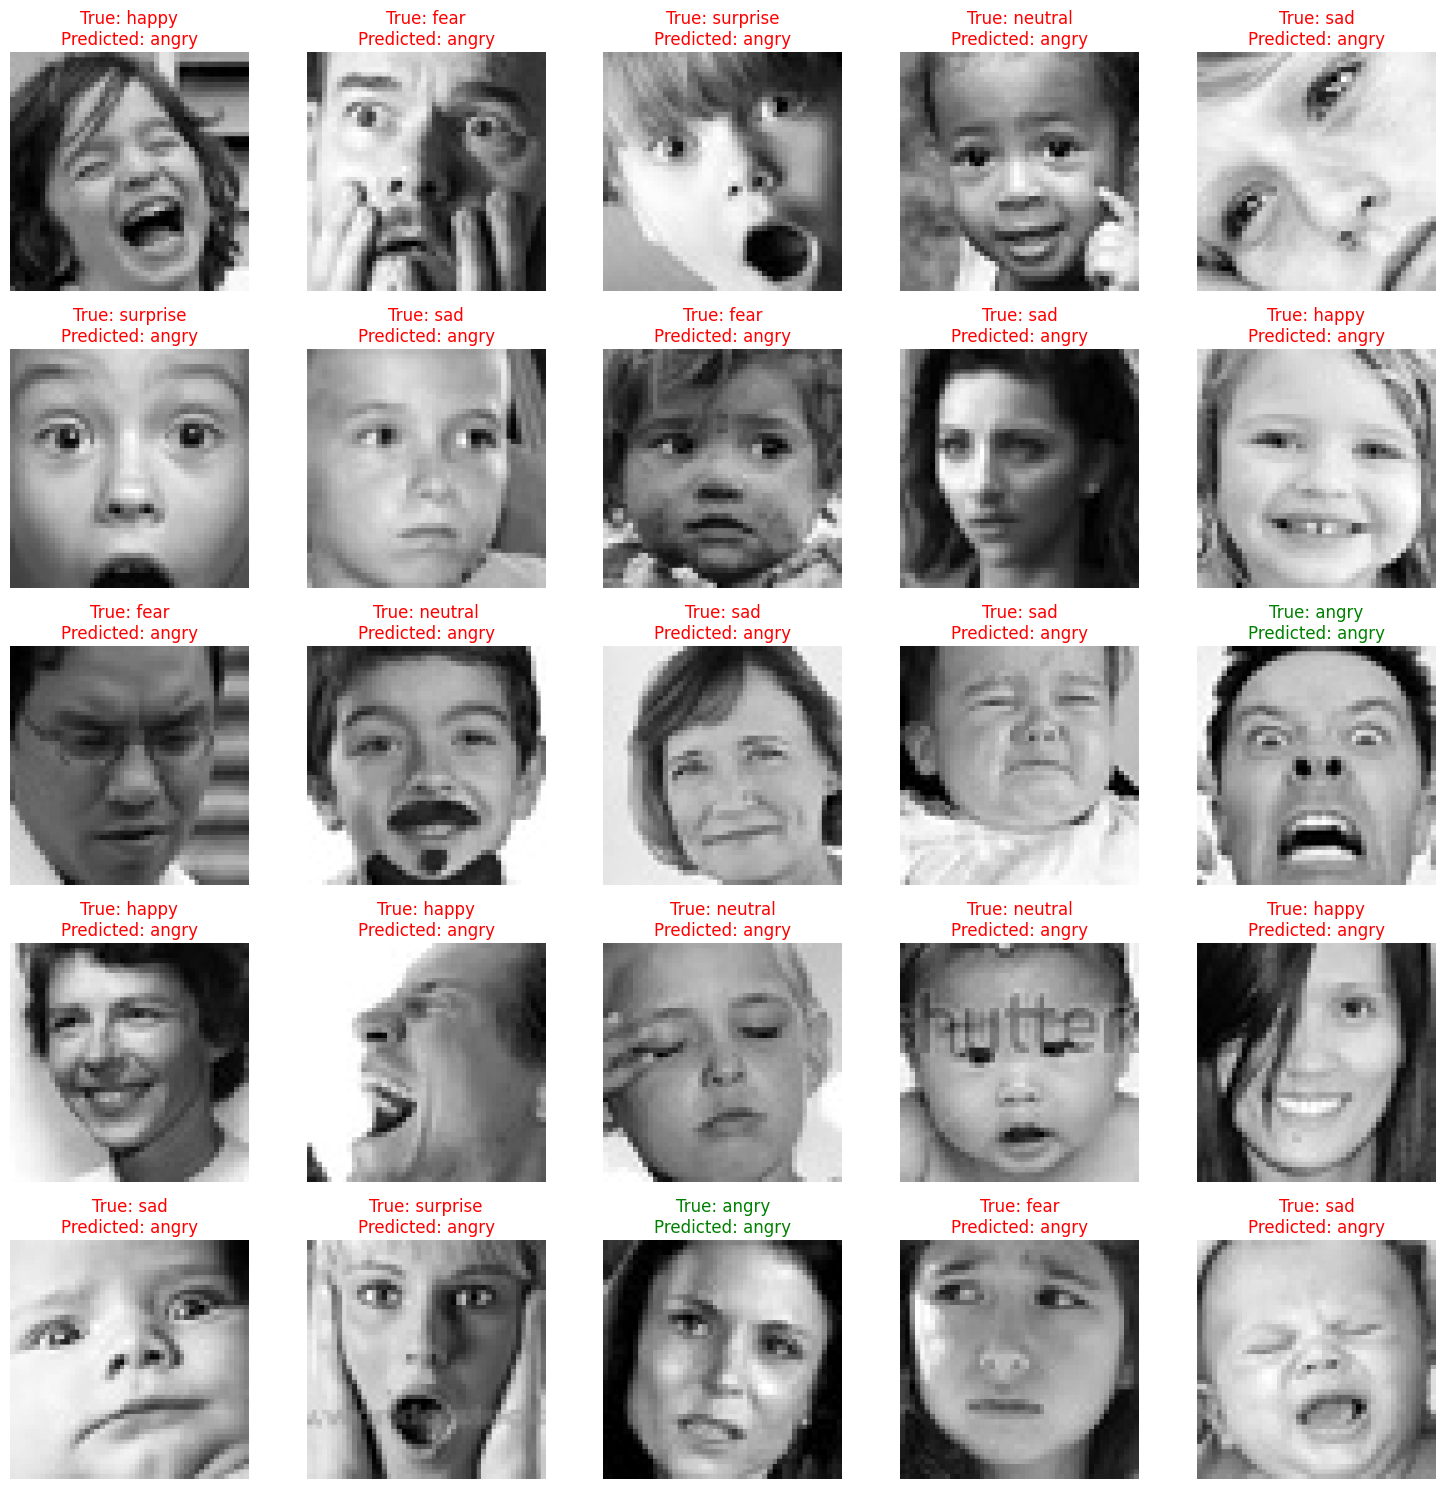

In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load your trained model
model_path = 'emotion_model_sequential.h5'  # Change this to your actual model path
model = load_model(model_path)

# Define the path to your test images
test_dir = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test'

# Define emotion labels (ensure they match your training labels)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load test images and labels
X_test = []
y_test = []
image_paths = []

for emotion in emotion_labels:
    emotion_path = os.path.join(test_dir, emotion)  # Path to each emotion folder
    if not os.path.exists(emotion_path):  # Check if the folder exists
        print(f"Warning: Folder {emotion_path} not found!")
        continue
    
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = load_img(img_path, target_size=(224, 224), color_mode="grayscale")  # Load and resize
        img_array = img_to_array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (grayscale)
        
        X_test.append(img_array)
        y_test.append(emotion_labels.index(emotion))  # Convert emotion to index
        image_paths.append(img_path)

# Convert to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

print("✅ Test images loaded successfully!")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Make predictions
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the predicted labels

# Plot 25 random test images with predictions
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    idx = np.random.randint(0, len(X_test))  # Select random image
    image = X_test[idx]
    label = y_test[idx]
    pred = y_pred[idx]

    title_color = 'green' if label == pred else 'red'  # Green if correct, Red if wrong

    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"True: {emotion_labels[label]}\nPredicted: {emotion_labels[pred]}", color=title_color)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [7]:
import os
import numpy as np
import cv2
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('emotion_model_sequential.h5')

# Emotion labels
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.2  

# Load OpenCV Face Detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load test dataset (replace with your actual test dataset)
X_test = np.load("X_test.npy")  # Shape: (N, 224, 224, 1)
y_test = np.load("y_test.npy")  # Shape: (N,)

# Function to predict emotion
def predict_emotion(image):
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = np.expand_dims(image, axis=-1)  # Add channel dimension (grayscale)
    
    predictions = model.predict(image)[0]
    pred_idx = np.argmax(predictions)
    confidence = np.max(predictions)
    
    if confidence < CONFIDENCE_THRESHOLD:
        return "Uncertain", confidence
    return emotions[pred_idx], confidence

# Function to show 25 random test images with predictions
def show_random_predictions():
    fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(10, 8))
    axes = axes.flatten()

    y_pred = np.argmax(model.predict(X_test), axis=1)  # Predict all test images

    for i in range(25):
        idx = np.random.randint(0, len(X_test))
        image = X_test[idx].squeeze()  # Remove extra dimensions
        label = y_test[idx]
        pred = y_pred[idx]

        title_color = 'green' if label == pred else 'red'
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Actual: {emotions[label]}\nPredicted: {emotions[pred]}", color=title_color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Function to open file dialog for manual image selection
def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])
    if not file_path:
        return

    # Load image and detect face
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))

    results = []
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224))

        emotion, confidence = predict_emotion(face_resized)

        results.append(f"{emotion} ({confidence:.2f})")

        # Draw rectangle & label on image
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f"{emotion} ({confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save and display processed image
    processed_path = "processed_image.jpg"
    cv2.imwrite(processed_path, img)
    display_image(processed_path)

    # Show detected emotion in UI
    result_text.set("\n".join(results))

# Function to display image in Tkinter UI
def display_image(image_path):
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

# Initialize Tkinter UI
root = tk.Tk()
root.title("Emotion Detection")

# UI Elements
Button(root, text="Select Image", command=open_file, font=("Arial", 14)).pack(pady=10)
Button(root, text="Show Random Predictions", command=show_random_predictions, font=("Arial", 14)).pack(pady=10)
image_label = Label(root)
image_label.pack()
result_text = tk.StringVar()
Label(root, textvariable=result_text, font=("Arial", 14)).pack(pady=10)

# Run Application
root.mainloop()


FileNotFoundError: [Errno 2] No such file or directory: 'X_test.npy'

In [6]:
import os
import numpy as np
import cv2
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk

# Load the trained model
model = tf.keras.models.load_model('emotion_model_sequential.h5')

# Emotion labels and colors
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotion_colors = {
    'angry': (0, 0, 255),
    'disgust': (0, 255, 0),
    'fear': (255, 0, 255),
    'happy': (0, 255, 255),
    'neutral': (128, 128, 128),
    'sad': (255, 0, 0),
    'surprise': (0, 165, 255)
}

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.2  

# Load OpenCV Face Detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def process_image(image_path):
    """Processes an image and detects emotions."""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))

    results = []
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224))  # Resize to model input size
        face_resized = face_resized / 255.0  # Normalize
        face_resized = np.expand_dims(face_resized, axis=0)  # Add batch dimension
        face_resized = np.expand_dims(face_resized, axis=-1)  # Add channel dimension (grayscale)

        predictions = model.predict(face_resized)[0]
        max_confidence = np.max(predictions)
        emotion_idx = np.argmax(predictions)

        if max_confidence < CONFIDENCE_THRESHOLD:
            emotion = "Uncertain"
            color = (128, 128, 128)
        else:
            emotion = emotion_labels[emotion_idx]
            color = emotion_colors[emotion]

        results.append({
            "emotion": emotion,
            "confidence": float(max_confidence),
            "coordinates": (x, y, w, h),
            "color": color
        })

        # Draw rectangle & label on image
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, f"{emotion} ({max_confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    processed_path = "processed_image.jpg"
    cv2.imwrite(processed_path, img)

    return results, processed_path

def open_file():
    """Opens file dialog to select an image and runs emotion detection."""
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])
    if not file_path:
        return

    results, processed_path = process_image(file_path)

    # Update UI with processed image and detected emotions
    display_image(processed_path)
    result_text.set("\n".join([f"{r['emotion']} ({r['confidence']:.2f})" for r in results]))

def display_image(image_path):
    """Displays an image in the Tkinter GUI."""
    img = Image.open(image_path)
    img = img.resize((300, 300))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

# Initialize Tkinter UI
root = tk.Tk()
root.title("Emotion Detection")

# UI Elements
Button(root, text="Select Image", command=open_file, font=("Arial", 14)).pack(pady=10)
image_label = Label(root)
image_label.pack()
result_text = tk.StringVar()
Label(root, textvariable=result_text, font=("Arial", 14)).pack(pady=10)

# Run Application
root.mainloop()


In [4]:
import os
import numpy as np
import tensorflow as tf
import cv2
from flask import Flask, request, render_template, jsonify
from werkzeug.utils import secure_filename

# Load the trained model
model = tf.keras.models.load_model('emotion_model_sequential.h5')

# Emotion labels and colors
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotion_colors = {
    'angry': (0, 0, 255),
    'disgust': (0, 255, 0),
    'fear': (255, 0, 255),
    'happy': (0, 255, 255),
    'neutral': (128, 128, 128),
    'sad': (255, 0, 0),
    'surprise': (0, 165, 255)
}

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.2  

# Set up Flask app
app = Flask(__name__)

# Directory to save uploaded images
UPLOAD_FOLDER = 'static/uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load OpenCV Face Detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def process_image(image_path):
    """Processes an image and detects emotions."""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))

    results = []
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224))  # Resize to model input size
        face_resized = face_resized / 255.0  # Normalize
        face_resized = np.expand_dims(face_resized, axis=0)  # Add batch dimension
        face_resized = np.expand_dims(face_resized, axis=-1)  # Add channel dimension (grayscale)

        predictions = model.predict(face_resized)[0]
        max_confidence = np.max(predictions)
        emotion_idx = np.argmax(predictions)

        if max_confidence < CONFIDENCE_THRESHOLD:
            emotion = "Uncertain"
            color = (128, 128, 128)
        else:
            emotion = emotion_labels[emotion_idx]
            color = emotion_colors[emotion]

        results.append({
            "emotion": emotion,
            "confidence": float(max_confidence),
            "coordinates": (x, y, w, h),
            "color": color
        })

        # Draw rectangle & label on image
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, f"{emotion} ({max_confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Save the processed image
    processed_path = os.path.join(UPLOAD_FOLDER, "processed_" + os.path.basename(image_path))
    cv2.imwrite(processed_path, img)

    return results, processed_path

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/upload', methods=['POST'])
def upload_file():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No selected file'}), 400

    filename = secure_filename(file.filename)
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    file.save(filepath)

    results, processed_path = process_image(filepath)

    return jsonify({
        'results': results,
        'processed_image': processed_path
    })

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import threading

# Load the trained model
try:
    model = tf.keras.models.load_model('emotion_model_sequential.h5')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Emotion labels and colors
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotion_colors = {
    'angry': (0, 0, 255),       # Red
    'disgust': (0, 255, 0),      # Green
    'fear': (255, 0, 255),       # Purple
    'happy': (0, 255, 255),      # Yellow
    'neutral': (128, 128, 128),  # Gray
    'sad': (255, 0, 0),          # Blue
    'surprise': (0, 165, 255)    # Orange
}

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.2

# Open the webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Global variable to store predictions
predictions = None

def predict_emotion(face_resized):
    """ Run model prediction in a separate thread """
    global predictions
    predictions = model.predict(face_resized)[0]

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert frame to RGB (for model input) and grayscale (for face detection)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected.")

    for (x, y, w, h) in faces:
        # Extract face from the frame
        face = rgb_frame[y:y+h, x:x+w]

        # Resize & normalize
        face_resized = cv2.resize(face, (224, 224))  # Resize to model input size
        face_resized = face_resized / 255.0  # Normalize pixel values
        face_resized = np.expand_dims(face_resized, axis=0)  # Add batch dimension

        # Run prediction in a separate thread
        thread = threading.Thread(target=predict_emotion, args=(face_resized,))
        thread.start()
        thread.join()  # Wait for prediction to complete

        if predictions is not None:
            max_confidence = np.max(predictions)
            emotion_idx = np.argmax(predictions)

            # If confidence is too low, show "Uncertain"
            if max_confidence < CONFIDENCE_THRESHOLD:
                emotion = "Uncertain"
                color = (128, 128, 128)  # Gray
                label = "Uncertain"
            else:
                emotion = emotion_labels[emotion_idx]
                color = emotion_colors[emotion]
                label = f"{emotion} ({max_confidence:.2f})"

            # Draw rectangle and label
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Display the frame
    cv2.imshow('Real-Time Emotion Detection', frame)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


Model loaded successfully.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.


Exception in thread Thread-3:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 933, in _

No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face de

Exception in thread Thread-21:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in 

No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.


Exception in thread Thread-22:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in 

No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face de

Exception in thread Thread-68:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in 

No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face de

Exception in thread Thread-75:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in 

No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face de

Exception in thread Thread-88:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in 

No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.
No face detected.


Exception in thread Thread-99:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in 

No face detected.


Exception in thread Thread-101:
Traceback (most recent call last):
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdur\AppData\Local\Temp\ipykernel_32556\2689703050.py", line 44, in predict_emotion
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1751, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\eager\def_function.py", line 924, in

In [4]:
import cv2
import numpy as np
import tensorflow as tf

img = cv2.imread("WIN_20250304_05_14_04_Pro")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)
predictions = model.predict(img)[0]
print(f"Predictions: {predictions}")

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [5]:
print(model.input_shape)
print(face_resized.shape)


(None, 224, 224, 1)


NameError: name 'face_resized' is not defined